<a href="https://colab.research.google.com/github/Reuben-Alex/Bank-Customer-Classification/blob/main/Drug_Classification_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
**Pharmaceutical companies need a classification model to accurately predict how suitable a drug is to a patient based on his/her information , condition and diagnosis.**

# **About the Dataset**
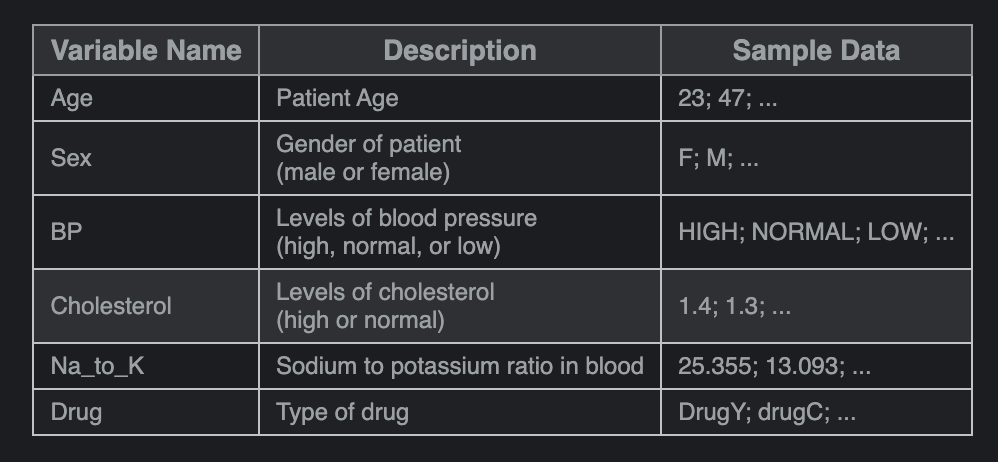

# **Data Cleaning**

In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize




In [2]:
# Loading the dataset
df = pd.read_csv('drug200.csv')

In [3]:
# Understanding the data
df.shape

(200, 6)

In [4]:
# Data Description
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
# First 5 rows
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
# datatype and null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
# Checking for missing values
df.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


***We can see that the dataset is pretty clean and there are no missing value treatment that is needed to be done.***

# **Outlier Detection**

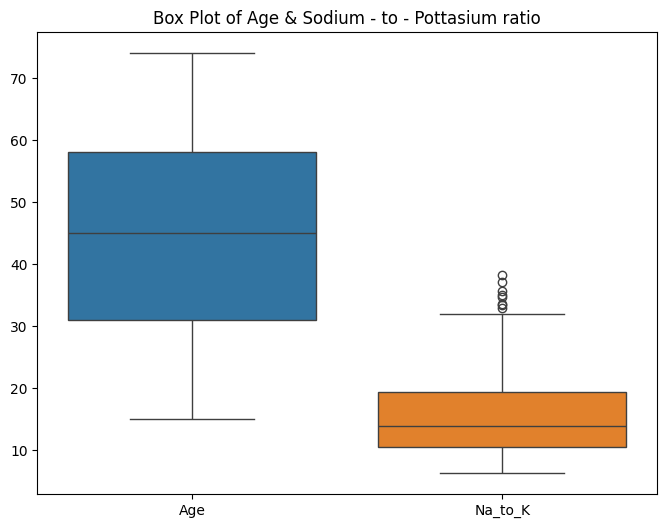

In [8]:
# Boxplot for all numerical columns in the dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, orient='v')
plt.title("Box Plot of Age & Sodium - to - Pottasium ratio")
plt.show()

***As we can see there are a few outliers in the Na_to_K column. We will keep the outliers as it is and will not remove them to ensure variability in the data.***

# **Uni-variate Analysis**

<ipython-input-9-3cd339c99e47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']);


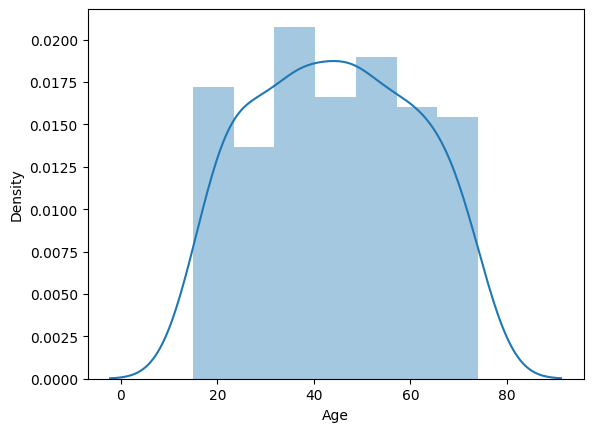

In [9]:
sns.distplot(df['Age']);

***We can notice that the age of the patients are following a normal distribution , which means we have patients of all age groups equally spread out.***

<ipython-input-10-5a583057d479>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Na_to_K']);


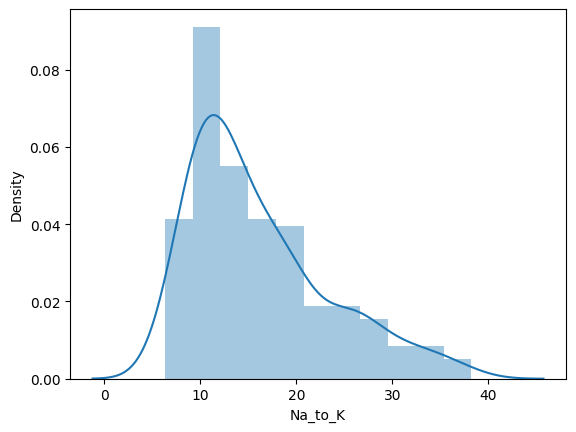

In [10]:
sns.distplot(df['Na_to_K']);

<ipython-input-11-33cdc98d61e5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Drug", data=df, palette="flare")


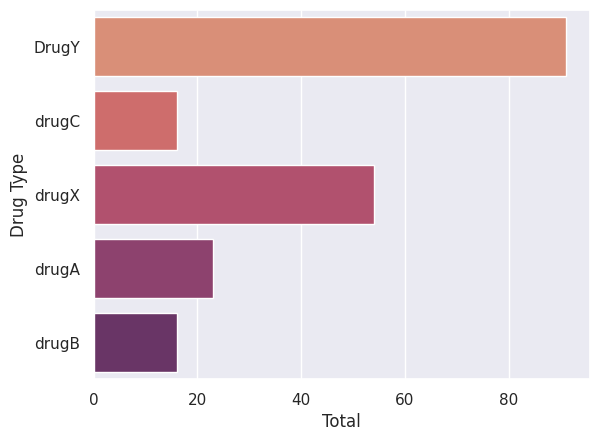

In [11]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

<ipython-input-12-dfca3589a375>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="rocket")


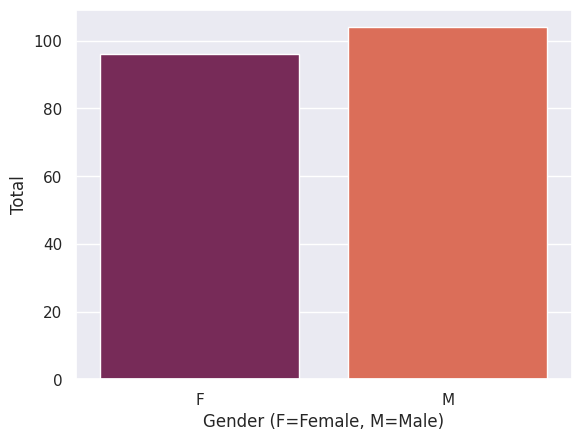

In [12]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

<ipython-input-13-4cad95c4e78a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="BP", data=df, palette="crest")


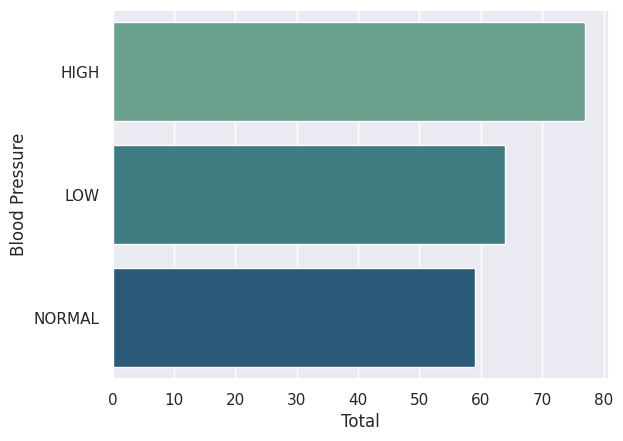

In [13]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()


<ipython-input-14-fd59ce780f13>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Cholesterol", data=df, palette="crest")


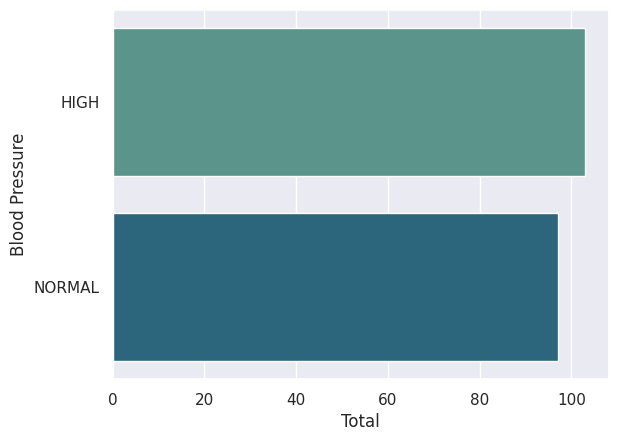

In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Cholesterol", data=df, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()


# **Bi-variate Analysis**

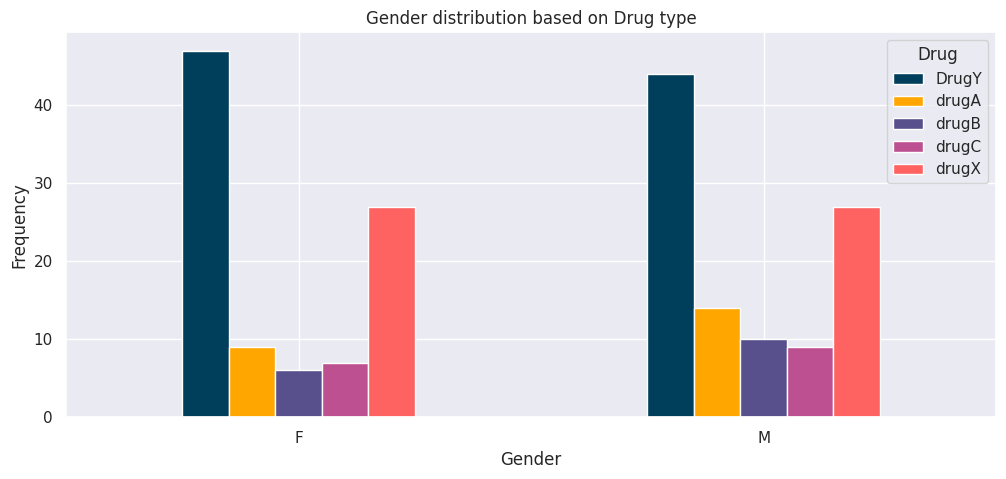

In [15]:
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

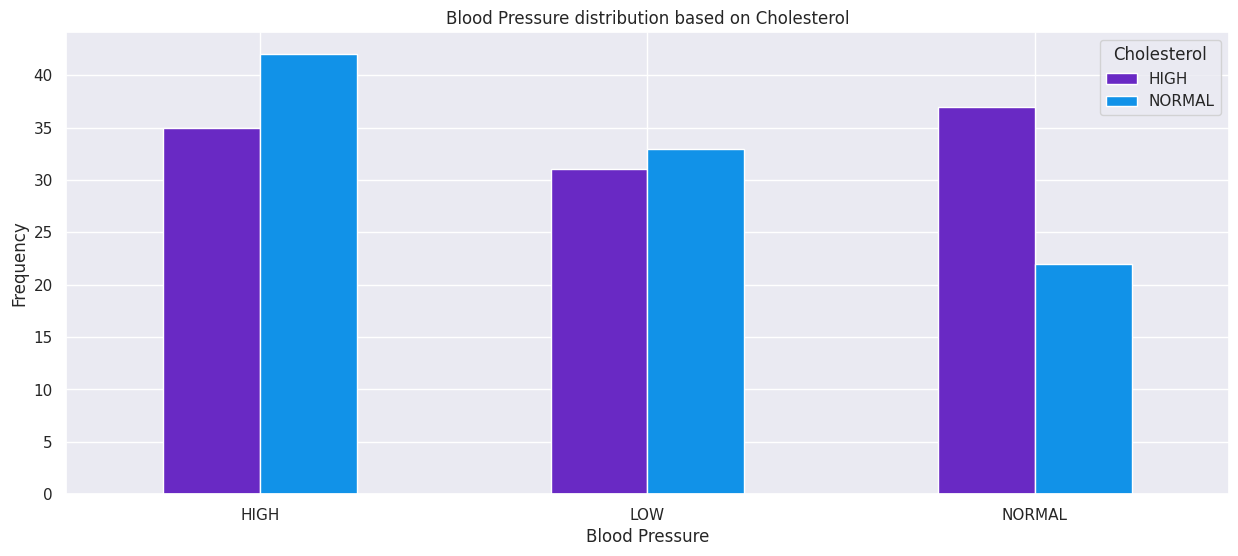

In [16]:
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()


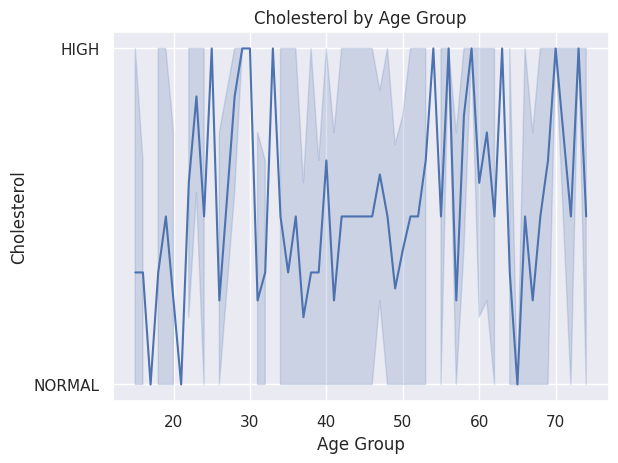

In [17]:
# Assuming 'age_group' is a categorical variable
sns.lineplot(x='Age', y='Cholesterol', data=df)
plt.xlabel('Age Group')
plt.ylabel('Cholesterol')
plt.title('Cholesterol by Age Group')
plt.show()

In [18]:
import plotly.express as px

fig = px.box(df, x='BP', y='Na_to_K', points='all')
fig.update_traces(marker_color="dodgerblue")
fig.update_layout(
    title="Bullet Graph of Na_to_K by BP Level",
    xaxis_title="BP Level",
    yaxis_title="Na_to_K Ratio"
)
fig.show()

# **Multi-variate Analysis**

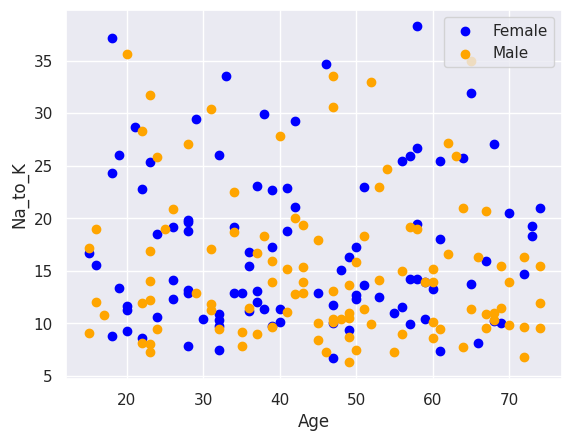

In [19]:
plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="Blue")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()


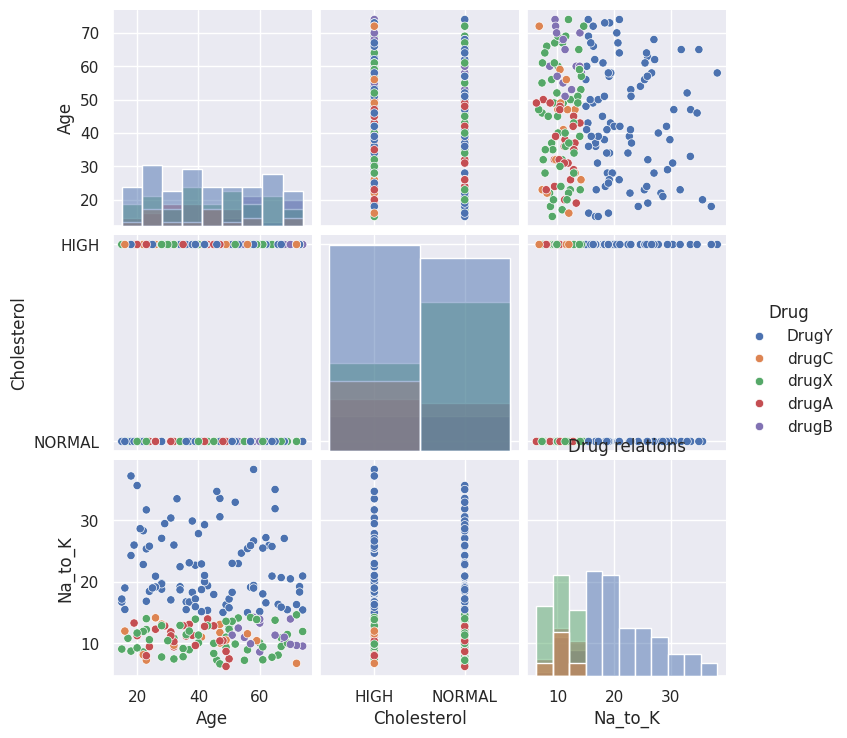

In [20]:


# Specify the diagonal plot type as 'hist' for categorical or discrete data
sns.pairplot(df, hue="Drug", vars=["Age", "Cholesterol", "Na_to_K"], diag_kind="hist")
plt.title("Drug relations")
plt.show()

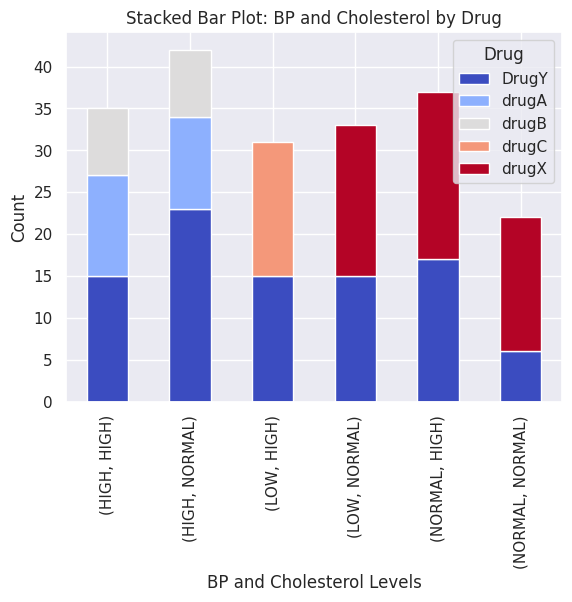

In [21]:
bp_chol = pd.crosstab([df['BP'], df['Cholesterol']], df['Drug'])
bp_chol.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Stacked Bar Plot: BP and Cholesterol by Drug')
plt.xlabel('BP and Cholesterol Levels')
plt.ylabel('Count')
plt.show()

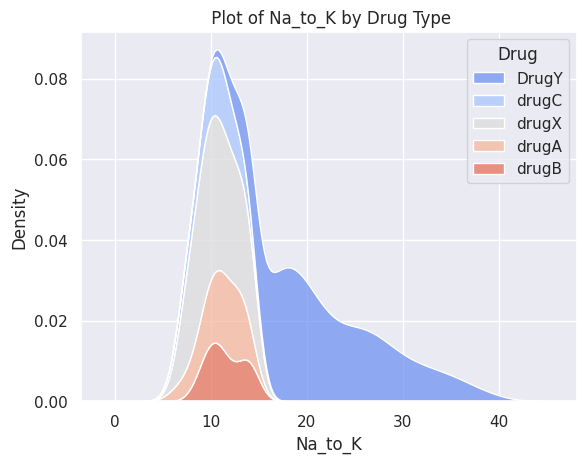

In [22]:
sns.kdeplot(data=df, x='Na_to_K', hue='Drug', multiple='stack', palette='coolwarm')
plt.title(' Plot of Na_to_K by Drug Type')
plt.show()

In [23]:


# Example data: unique counts of transitions
labels = ['High BP', 'Normal BP', 'Low BP', 'High Cholesterol', 'Normal Cholesterol', 'DrugY', 'DrugX', 'DrugC']
source = [0, 0, 1, 1, 2, 2]  # From BP categories
target = [3, 4, 3, 4, 5, 6]  # To Cholesterol and Drug categories
values = [10, 20, 30, 40, 50, 60]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source,  # indices of source
        target=target,  # indices of target
        value=values
    )))

fig.update_layout(title_text="Sankey Diagram for BP and Cholesterol to Drug", font_size=10)
fig.show()

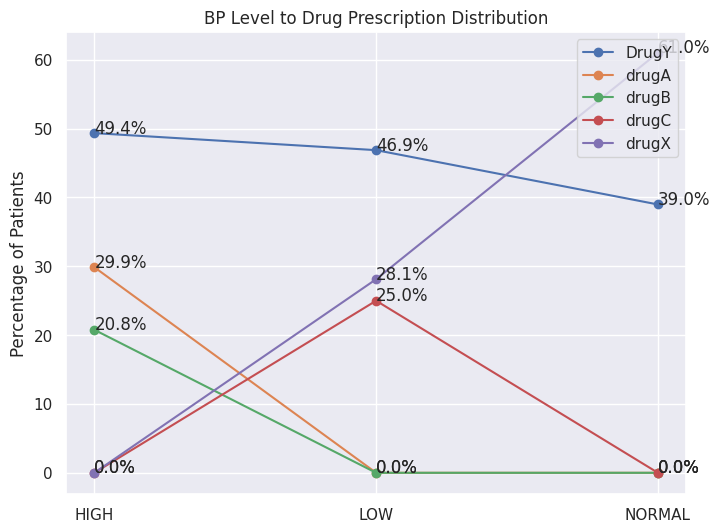

In [24]:

#BP to Drug distribution counts
bp_counts = df.groupby('BP')['Drug'].value_counts().unstack().fillna(0)
bp_counts = bp_counts.apply(lambda x: (x / x.sum()) * 100, axis=1)

fig, ax = plt.subplots(figsize=(8, 6))
for drug in bp_counts.columns:
    plt.plot(bp_counts.index, bp_counts[drug], marker='o', label=drug)
    for i, txt in enumerate(bp_counts[drug]):
        ax.annotate(f'{txt:.1f}%', (bp_counts.index[i], bp_counts[drug].iloc[i]))

plt.title('BP Level to Drug Prescription Distribution')
plt.ylabel('Percentage of Patients')
plt.legend()
plt.show()


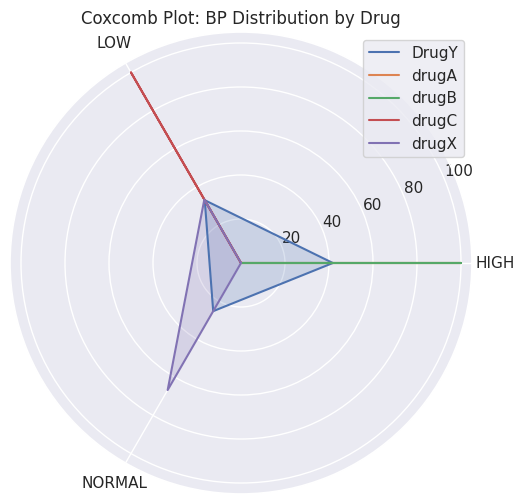

In [25]:
bp_counts = df.groupby('Drug')['BP'].value_counts().unstack().fillna(0)
bp_counts = bp_counts.apply(lambda x: (x / x.sum()) * 100, axis=1)

labels = bp_counts.columns
drug_types = bp_counts.index
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})

for idx, drug in enumerate(drug_types):
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    stats = bp_counts.loc[drug].values
    stats = np.concatenate((stats, [stats[0]]))
    angles += angles[:1]
    ax.plot(angles, stats, label=drug)
    ax.fill(angles, stats, alpha=0.2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Coxcomb Plot: BP Distribution by Drug')
plt.legend()
plt.show()

# **Preprocessing Data**

In [26]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [27]:
# Splitting dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [28]:
# Creating dummy data
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [29]:
# Checking
X_train.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
131,52,32.922,False,True,False,True,False,False,True
96,58,38.247,True,False,False,True,False,True,False
181,59,13.884,True,False,False,False,True,True,False
19,32,25.974,True,False,True,False,False,False,True
153,72,14.642,True,False,False,True,False,False,True


In [30]:
# Checking
X_test.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
18,23,7.298,False,True,False,True,False,True,False
170,28,12.879,True,False,False,False,True,True,False
107,42,20.013,False,True,False,True,False,True,False
98,20,35.639,False,True,True,False,False,False,True
177,25,19.011,False,True,False,False,True,True,False


In [31]:
# Smote technique used to oversample undersampled data
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

<ipython-input-32-7129074dd33b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




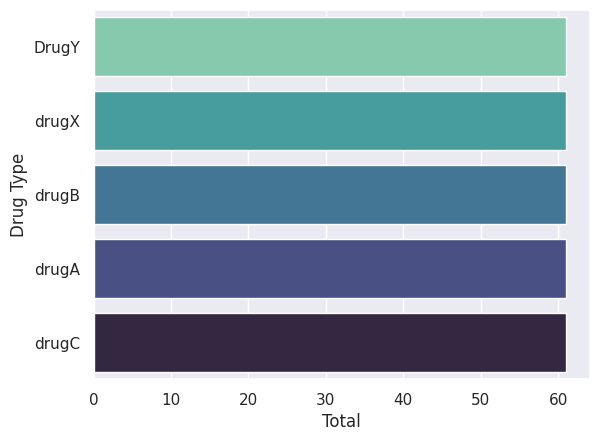

In [32]:
# Checking
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

# **Naive Bayes Classification**

In [33]:

NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)


CategoricalNB()

In [34]:
# predicting response variable
y_pred_1 = NBclassifier1.predict(X_test)



In [35]:
# Model evaluation
print(classification_report(y_test, y_pred_1))
print(confusion_matrix(y_test, y_pred_1))
NBAcc1 = accuracy_score(y_pred_1,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.40      0.80      0.53         5
       drugB       0.50      0.33      0.40         3
       drugC       0.50      1.00      0.67         4
       drugX       0.95      1.00      0.97        18

    accuracy                           0.80        60
   macro avg       0.67      0.77      0.68        60
weighted avg       0.88      0.80      0.81        60

[[21  4  0  4  1]
 [ 0  4  1  0  0]
 [ 0  2  1  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Naive Bayes accuracy is: 80.00%


# **Logistic Regression**

In [36]:

LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

In [37]:
# Predicting response variable
y_pred = LRclassifier.predict(X_test)

In [38]:
# Model Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       DrugY       0.96      0.90      0.93        30
       drugA       1.00      0.60      0.75         5
       drugB       0.50      1.00      0.67         3
       drugC       1.00      1.00      1.00         4
       drugX       0.89      0.94      0.92        18

    accuracy                           0.90        60
   macro avg       0.87      0.89      0.85        60
weighted avg       0.93      0.90      0.90        60

[[27  0  1  0  2]
 [ 0  3  2  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]
Logistic Regression accuracy is: 90.00%


# **Model Comparison**

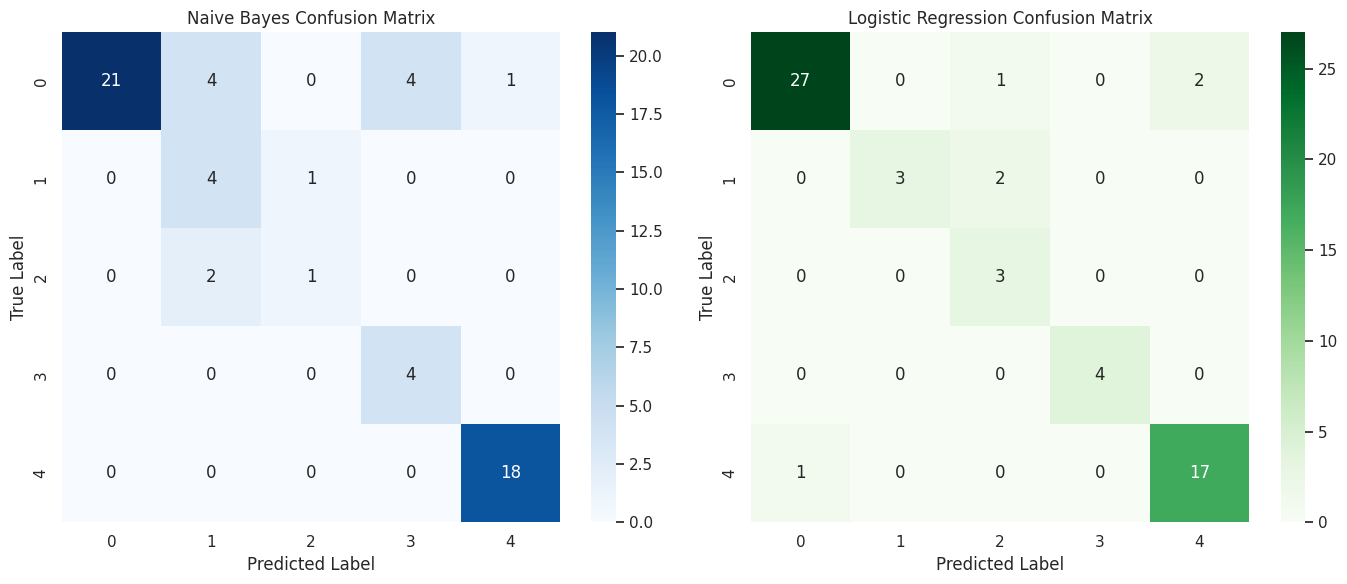

In [39]:

# Generate confusion matrices for both models
conf_matrix_nb = confusion_matrix(y_test, NBclassifier1.predict(X_test))
conf_matrix_lr = confusion_matrix(y_test, LRclassifier.predict(X_test))

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot confusion matrix for Naive Bayes
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Naive Bayes Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Plot confusion matrix for Logistic Regression
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

# Adjust layout
plt.tight_layout()
plt.show()

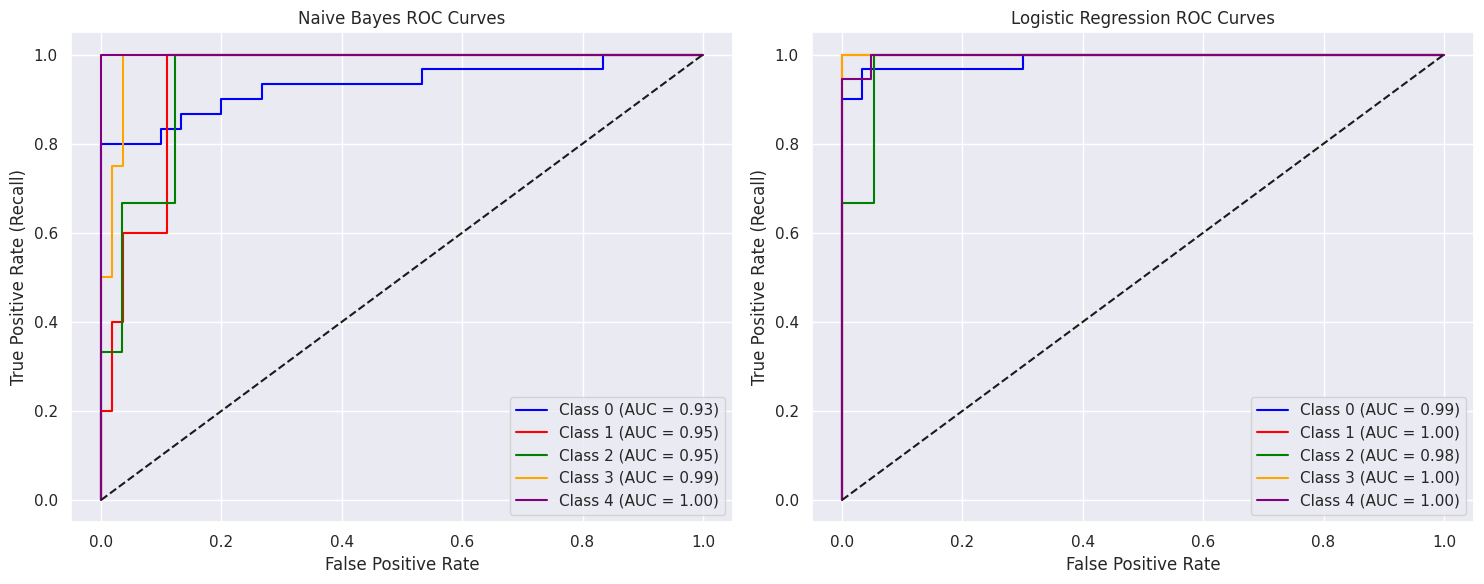

In [40]:

# Make the labels binary for multiclass comparison
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Get the probability predictions for both models
y_pred_prob_nb = NBclassifier1.predict_proba(X_test)
y_pred_prob_lr = LRclassifier.predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class (One-vs-Rest)
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()

fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()

for i in range(n_classes):
    # ROC and AUC for Naive Bayes
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_nb[:, i])
    roc_auc_nb[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob_nb[:, i])

    # ROC and AUC for Logistic Regression
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_lr[:, i])
    roc_auc_lr[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob_lr[:, i])



fig, axes = plt.subplots(1, 2, figsize=(15, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']

# Plot Naive Bayes ROC curves
axes[0].set_title("Naive Bayes ROC Curves")
for i in range(n_classes):
    axes[0].plot(fpr_nb[i], tpr_nb[i], color=colors[i], label=f"Class {i} (AUC = {roc_auc_nb[i]:.2f})")
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate (Recall)")
axes[0].legend(loc="lower right")

# Plot Logistic Regression ROC curves
axes[1].set_title("Logistic Regression ROC Curves")
for i in range(n_classes):
    axes[1].plot(fpr_lr[i], tpr_lr[i], color=colors[i], label=f"Class {i} (AUC = {roc_auc_lr[i]:.2f})")
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate (Recall)")
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

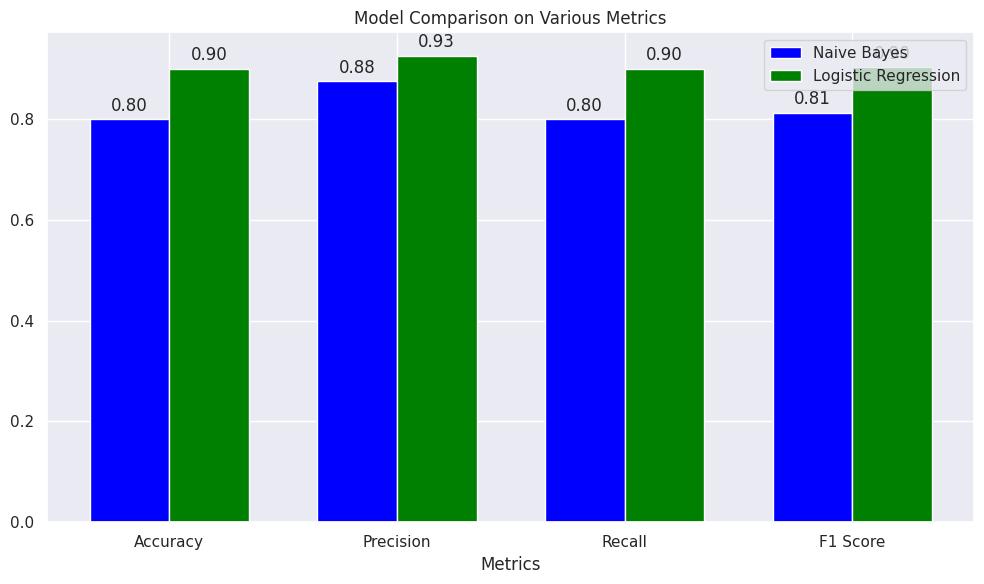

In [41]:

# Compute the metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, NBclassifier1.predict(X_test))
nb_precision = precision_score(y_test, NBclassifier1.predict(X_test), average='weighted')
nb_recall = recall_score(y_test, NBclassifier1.predict(X_test), average='weighted')
nb_f1 = f1_score(y_test, NBclassifier1.predict(X_test), average='weighted')

# Compute the metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, LRclassifier.predict(X_test))
lr_precision = precision_score(y_test, LRclassifier.predict(X_test), average='weighted')
lr_recall = recall_score(y_test, LRclassifier.predict(X_test), average='weighted')
lr_f1 = f1_score(y_test, LRclassifier.predict(X_test), average='weighted')

# Create a bar chart to compare the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
nb_scores = [nb_accuracy, nb_precision, nb_recall, nb_f1]
lr_scores = [lr_accuracy, lr_precision, lr_recall, lr_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, nb_scores, width, label='Naive Bayes', color='blue')
bars2 = ax.bar(x + width/2, lr_scores, width, label='Logistic Regression', color='green')
ax.set_xlabel('Metrics')
ax.set_title('Model Comparison on Various Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate bars with their values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()